# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [21]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [22]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [23]:
# 先執行 GridSearchCV 跑出最佳參數
params = {
    "pca__n_components":[4, 10, 20, 30, 40, 50, 60],
    "logistic__alpha": np.logspace(-4, 4, 5)
}
grid = GridSearchCV(pipe, params, 
                    iid=False,
                    cv=5,
                    return_train_score=False)

grid.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.911):
{'logistic__alpha': 0.01, 'pca__n_components': 30}


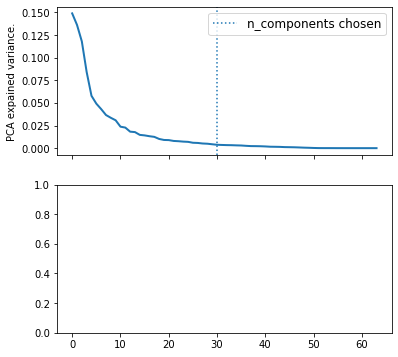

In [24]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6,6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel("PCA expained variance.")

ax0.axvline(grid.best_estimator_.named_steps["pca"].n_components, 
            linestyle=":",
            label="n_components chosen")
ax0.legend(prop=dict(size=12))

In [25]:
# 繪製不同採樣點的分類正確率
results = pd.DataFrame(grid.cv_results_)
best_clfs = results.groupby("param_pca__n_components").apply(lambda x: x.nlargest(1, "mean_test_score"))
best_clfs

,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_pca__n_components,,,,,,,,,,,,,,,,
4,7,0.053784,0.002220,0.000605,0.000494,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.775000,0.738889,0.779944,0.785515,0.738162,0.763502,0.020664,13
10,8,0.055370,0.006711,0.000388,0.000475,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.905556,0.852778,0.891365,0.913649,0.838440,0.880357,0.029605,11
20,9,0.095045,0.013261,0.000740,0.000385,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.927778,0.872222,0.905292,0.941504,0.883008,0.905961,0.026095,3
30,10,0.198239,0.007257,0.000887,0.000105,0.01,30,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.947222,0.855556,0.919220,0.952646,0.880223,0.910973,0.037777,1
40,4,0.111576,0.010966,0.000802,0.000401,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.908333,0.861111,0.922006,0.952646,0.885794,0.905978,0.031179,2
50,12,0.413315,0.039081,0.000583,0.000476,0.01,50,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.891667,0.894444,0.922006,0.935933,0.871866,0.903183,0.022876,8
60,6,0.129656,0.008718,0.000592,0.000484,0.0001,60,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.902778,0.861111,0.933148,0.952646,0.874652,0.904867,0.034393,5


In [34]:
# 直接用pd的plot
best_clfs.plot(x="param_pca__n_components",
               y='mean_test_score',
               yerr="std_test_score",
               legend=False,
               ax=ax1)

ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

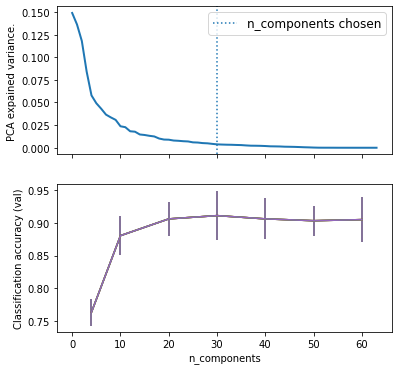

In [35]:
fig